In [7]:
from typing import List

from CONST import SEED, MODELS
from neural_networks import FNN, CNN, RNN, CRNN
from utils import set_seed, plot_confusion_matrix, make_predictions, calculate_metrics, save_metrics

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Model

In [8]:
set_seed(SEED)

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.8416 - accuracy: 0.7899
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4141 - accuracy: 0.8876
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3503 - accuracy: 0.9019
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.3176 - accuracy: 0.9101
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
INFO:tensorflow:Assets written to: models/FNN/assets


INFO:tensorflow:Assets written to: models/FNN/assets


Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.7475 - accuracy: 0.7910
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.2170 - accuracy: 0.9342
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1456 - accuracy: 0.9563
Epoch 4/5
938/938 [==============================] - 18s 20ms/step - loss: 0.1130 - accuracy: 0.9665
Epoch 5/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0936 - accuracy: 0.9717


ValueError: in user code:

    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file6qvhcg_w.py", line 10, in tf__call
        x = ag__.converted_call(ag__.ld(self).conv1, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer "cnn_2" (type CNN).
    
    in user code:
    
        File "/mnt/d/studia/sem5/POP/projekt/POP-4/neural_networks.py", line 34, in call  *
            x = self.conv1(x)
        File "/home/kieru/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
            raise ValueError(f'Input {input_index} of layer "{layer_name}" '
    
        ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)
    
    
    Call arguments received by layer "cnn_2" (type CNN):
      • x=tf.Tensor(shape=(None, 28, 28), dtype=float32)


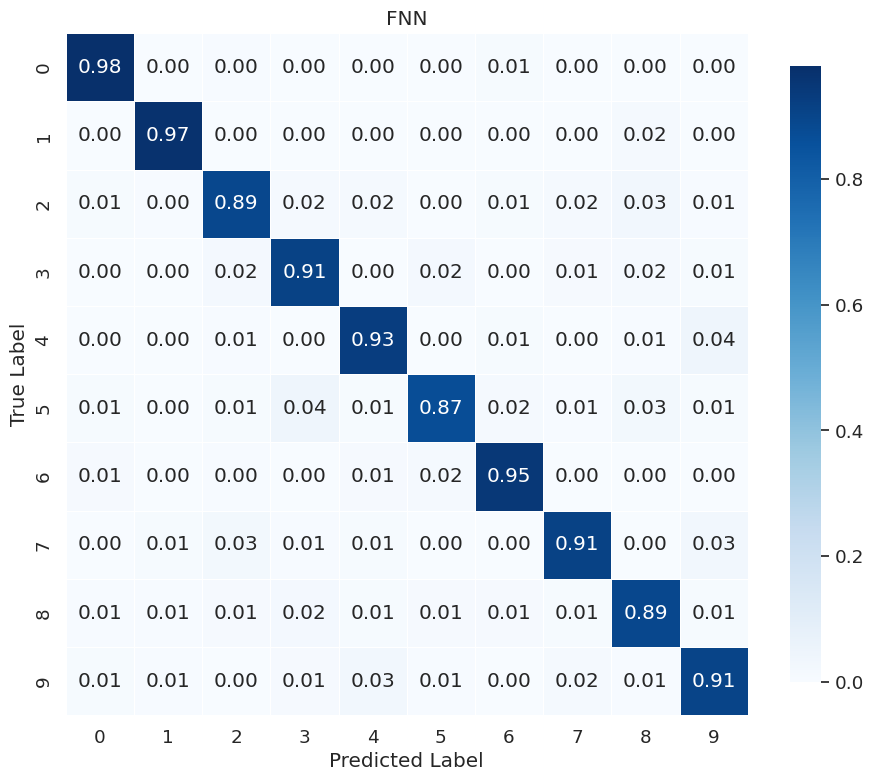

In [11]:
class_names = [str(ii) for ii in range(10)]

models: List[Model] = [FNN(), CNN(), CRNN()] #, RNN()]

for model in models:
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    # if str(model) == "RNN":
    #     train_images = train_images.reshape(train_images.shape[0], 28, 28)
    #     test_images = test_images.reshape(test_images.shape[0], 28, 28)

    model.fit(train_images, train_labels, epochs=5, batch_size=64, shuffle=True)

    predicted_labels = make_predictions(model, test_images)

    accuracy, precision, recall, conf_matrix = calculate_metrics(predicted_labels, np.argmax(test_labels, axis=1))
    save_metrics(str(model), accuracy=accuracy, precision=precision, recall=recall)
    # print(f"{str(model)} Evaluation - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    # print("Confusion Matrix:")
    # print(conf_matrix)
    
    plot_confusion_matrix(conf_matrix, class_names, title=f'{str(model)}', save=True)

    model.save(f"models/{str(model)}", save_format='tf')  